# Census Income Project
- Problem Statement:


- This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

- Description of fnlwgt (final weight)
- The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

- A single cell estimate of the population 16+ for each state.

- Controls for Hispanic Origin by age and sex.

- Controls by Race, age and sex.

- We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

### 
Some of the variables are not self-explanatory. The continuous variable fnlwgt represents final weight, which is the number of units in the target population that the responding unit represents. The variable education_num stands for the number of years of education in total, which is a continuous representation of the discrete variable education. The variable relationship represents the responding unit’s role in the family. capital_gain and capital_loss are income from investment sources other than wage/salary.

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from scipy import stats

In [2]:
df=pd.read_csv(r'C:\Users\tusha\Downloads\census_income.csv')
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
# to see the first fiver elements of the dataset
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


### 
- age-continuous
- workclass-Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked
- fnlwgt-continuous
- Education-Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- Education-num-continuous
- Marital-status-Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- Occupation-Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- Relationship-Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- Race-White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.-
- Sex-Female, Male
- Capital-loss-continuous
- Capital-gain-continuous
- Hours-per-week-continuous
- Native-country	United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
- Income	>50K , <=50K


### Dependent variable
The dependent variable is “income”, representing the level of income. A value of “<=50K” indicates “less than or equal to USD 50000” and “>50K” indicates “greater than USD 50000”

### Independent variable
Except income all the variables are independent variable from the census data.

In [4]:
# to check the shape of the dataset
df.shape

(32560, 15)

In [5]:
# There are 32560 rows and 15 columns

In [6]:
# To show the names of the columns 
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [7]:
# to check the datatypes of the columns
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [8]:
# Workclass, education, marital_status,Relationship,race,sex,Native_country and income are of Object type datatype.
# Age,Fnlwgt, Education_num,Capital_gain,Capital_loss and Hours_per_week are of integer type datatype.

In [9]:
# to check the missing values of the dataset
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [10]:
# checking the zero count
df[df['Capital_loss']==0].count()

Age               31041
Workclass         31041
Fnlwgt            31041
Education         31041
Education_num     31041
Marital_status    31041
Occupation        31041
Relationship      31041
Race              31041
Sex               31041
Capital_gain      31041
Capital_loss      31041
Hours_per_week    31041
Native_country    31041
Income            31041
dtype: int64

In [11]:
df[df['Capital_gain']==0].count()

Age               29849
Workclass         29849
Fnlwgt            29849
Education         29849
Education_num     29849
Marital_status    29849
Occupation        29849
Relationship      29849
Race              29849
Sex               29849
Capital_gain      29849
Capital_loss      29849
Hours_per_week    29849
Native_country    29849
Income            29849
dtype: int64

<AxesSubplot:title={'center':'Heatmap Null values'}>

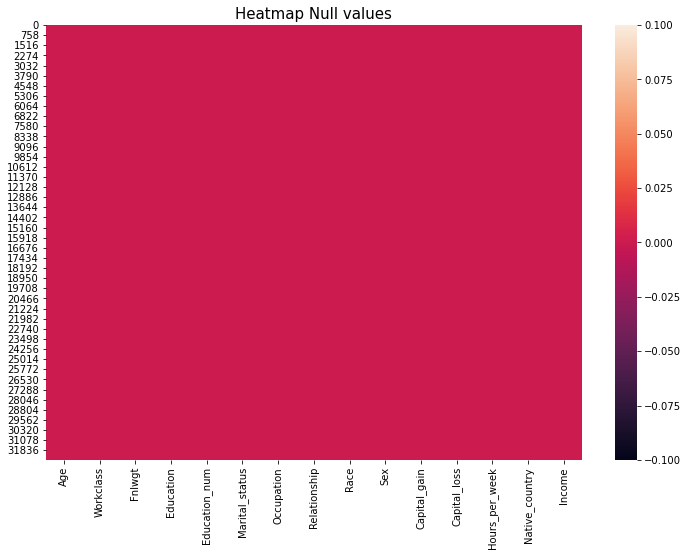

In [12]:
# to check the missing values using the heatmap
plt.figure(figsize=(12,8))
plt.title('Heatmap Null values',fontsize=15)
sns.heatmap(df.isnull())

In [13]:
df.describe()
# This will not include the cateforical variables.

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [14]:
# Statistical summary of the dataset
df.describe(include='all')
# by using all it can be assured that categorical features are also included.

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,32560.000000,32560,3.256000e+04,32560,32560.000000,32560,32560,32560,32560,32560,32560.000000,32560.000000,32560.000000,32560,32560
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27815,21789,NaN,NaN,NaN,29169,24719
mean,38.581634,NaN,1.897818e+05,NaN,10.080590,NaN,NaN,NaN,NaN,NaN,1077.615172,87.306511,40.437469,NaN,NaN
std,13.640642,NaN,1.055498e+05,NaN,2.572709,NaN,NaN,NaN,NaN,NaN,7385.402999,402.966116,12.347618,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178315e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783630e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370545e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [15]:
# from above it can be concluded that capital gain and capital_loss doesn't shows the median value.
# the provided dataset has the normal distribution.
# It can be seen that the standard deviation value of CapitaL_gain and Capital_loss is high.
# The value of mean and median is almost equal in Age Education_num, and Hours_per_week
# 50% tells about median value.
# The difference between mean and median is also known as outliers.
# Fnlwgt and age are slightly skewed is due to difference between median values.


# Exploratory Data Analysis

## Univariate Analysis

In [16]:
df.Income.value_counts(normalize=True,sort=True)

 <=50K    0.759183
 >50K     0.240817
Name: Income, dtype: float64

In [17]:
# From above data we can see that only 24.08% lies above 50K and 75.9183 are below 50K.

<AxesSubplot:>

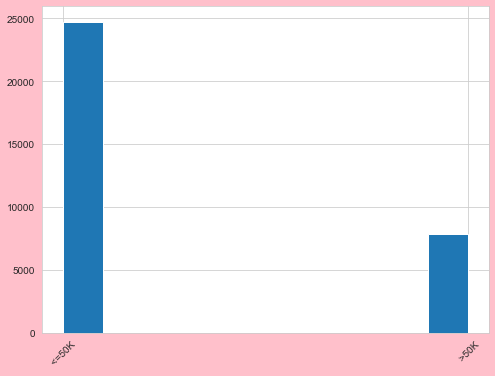

In [18]:
plt.figure(figsize=(8,6),facecolor='pink',edgecolor='black',frameon=True)
sns.set_style('whitegrid')
plt.xticks(rotation=45)
df['Income'].hist(grid=True)

In [19]:
# from the plot it can be seen that there are very less people who have income more than 50K.

<AxesSubplot:>

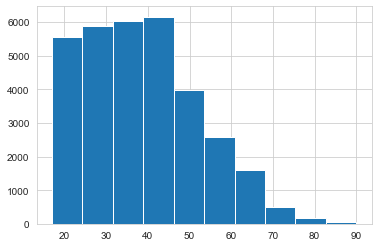

In [20]:
df['Age'].hist(grid=True)

In [21]:
# the population of age from 20-40 is more as compared to more than 40.

<AxesSubplot:>

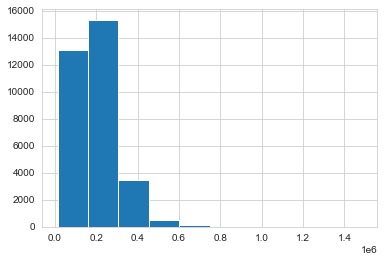

In [22]:
df['Fnlwgt'].hist(grid=True)

<AxesSubplot:>

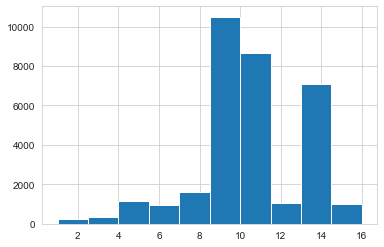

In [23]:
df['Education_num'].hist(grid=True)

<AxesSubplot:>

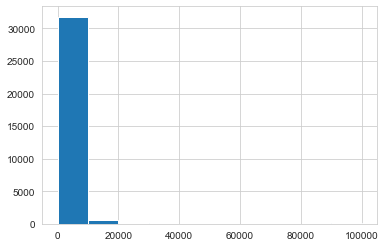

In [24]:
df['Capital_gain'].hist(grid=True)

<AxesSubplot:>

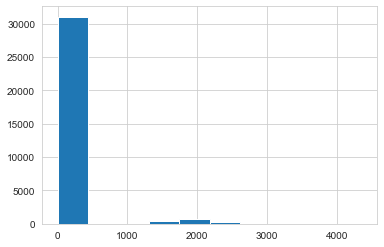

In [25]:
df['Capital_loss'].hist(grid=True)

<AxesSubplot:>

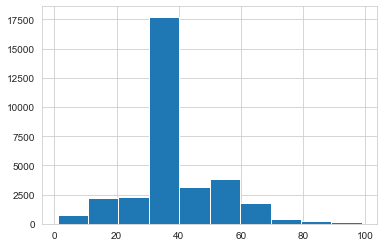

In [26]:
df['Hours_per_week'].hist(grid=True)

## Bivariate Analysis

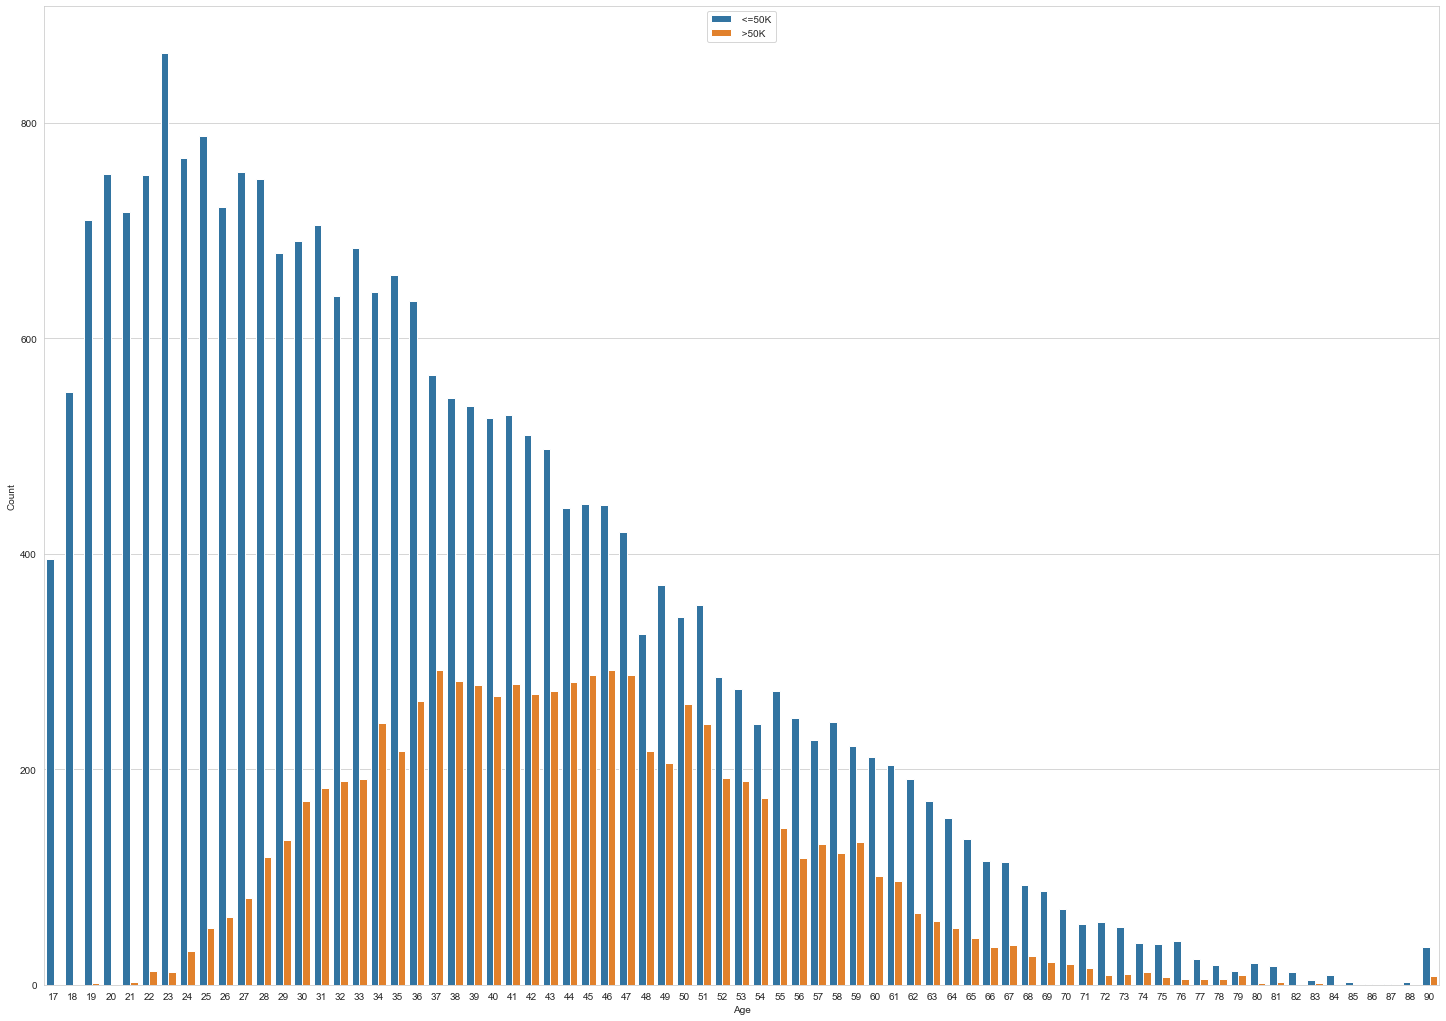

In [27]:
plt.figure(figsize=(25,18))
sns.countplot(x=df.Age, hue=df.Income)
plt.title("")
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()

In [28]:
# people who are having income more than 50K are from 30 to 60 age.

<AxesSubplot:xlabel='count', ylabel='Workclass'>

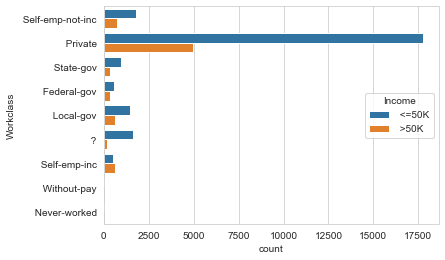

In [29]:
sns.countplot(y='Workclass',hue='Income',data=df)

In [30]:
# It can be seen from above plot that private workclass is leading in both categories.

<AxesSubplot:xlabel='count', ylabel='Sex'>

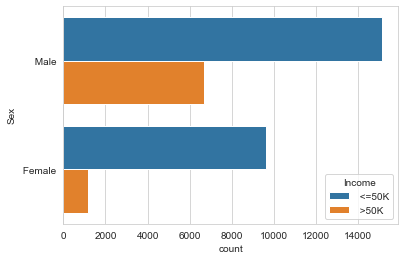

In [31]:
sns.countplot (y='Sex', hue='Income',data=df)

In [32]:
# Its clear from this plot that males are leading in both features and they are mojority in number.

<AxesSubplot:xlabel='count', ylabel='Education'>

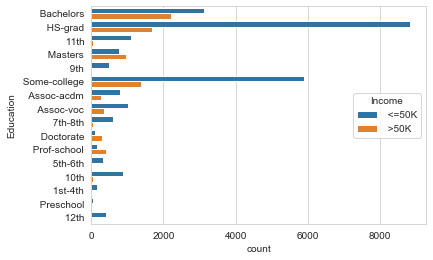

In [33]:
sns.countplot(y='Education', hue='Income',data=df)

In [34]:
# It can be seen that mojority of the HS-grad education hoding people are having more than 50K

<AxesSubplot:xlabel='count', ylabel='Occupation'>

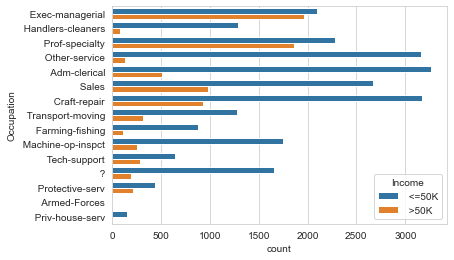

In [35]:
sns.countplot(y='Occupation', hue='Income',data=df)

In [36]:
# people of Exec-managerial,pro-specialty,adm-clerical,Sales,craft-repair are the one with income more than 50K

<AxesSubplot:xlabel='count', ylabel='Race'>

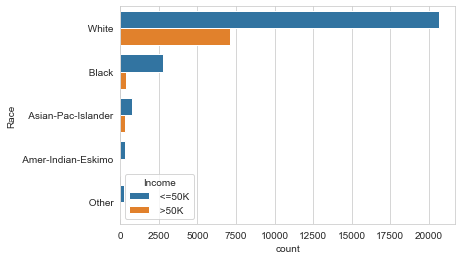

In [37]:
sns.countplot(y='Race', hue='Income',data=df)

In [38]:
# the population of white people are who have income more than 50K

<AxesSubplot:xlabel='count', ylabel='Marital_status'>

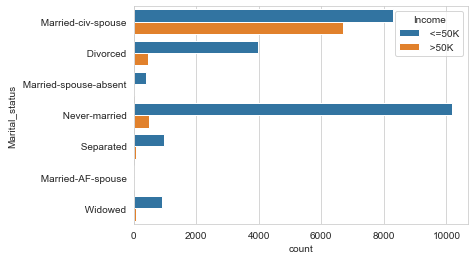

In [39]:
sns.countplot(y='Marital_status',hue='Income',data=df)

In [40]:
# Married-civ-spouse are the one who have income more than 50K.

<AxesSubplot:xlabel='count', ylabel='Native_country'>

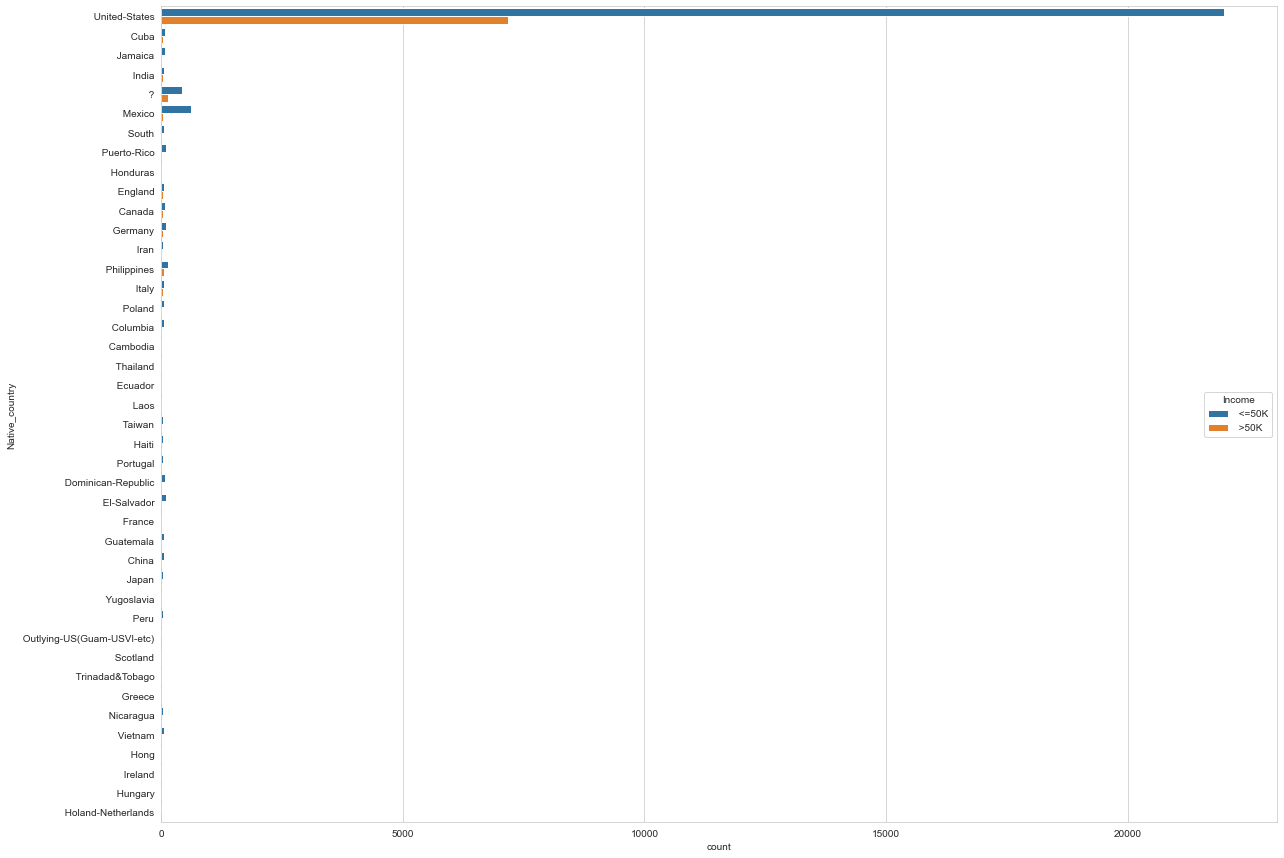

In [41]:
plt.figure(figsize=(20,15))
sns.countplot(y='Native_country',hue='Income',data=df)

In [42]:
# people living in United States are the one who are dominating more than 50K.

In [43]:
country_group = df.groupby('Native_country').sum().sort_values('Native_country')
country_group

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
Native_country,,,,,,
?,22577,112694423,6179,1053200,68949,24202
Cambodia,718,3668527,167,19529,3478,777
Canada,5148,21762205,1289,182000,15722,4889
China,3190,13428599,834,27486,13464,2834
Columbia,2343,13283815,553,10656,1602,2305
Cuba,4348,23397678,912,34887,6654,3720
Dominican-Republic,2641,13446269,498,103324,1762,2973
Ecuador,1026,5204047,265,14773,0,1108
El-Salvador,3618,26965655,725,60878,3298,3900


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 [Text(0, 0, ' United-States'),
  Text(1, 0, ' Cuba'),
  Text(2, 0, ' Jamaica'),
  Text(3, 0, ' India'),
  Text(4, 0, ' ?'),
  Text(5, 0, ' Mexico'),
  Text(6, 0, ' South'),
  Text(7, 0, ' Puerto-Rico'),
  Text(8, 0, ' Honduras'),
  Text(9, 0, ' England'),
  Text(10, 0, ' Canada'),
  Text(11, 0, ' Germany'),
  Text(12, 0, ' Iran'),
  Text(13, 0, ' Philippines'),
  Text(14, 0, ' Italy'),
  Text(15, 0, ' Poland'),
  Text(16, 0, ' Columbia'),
  Text(17, 0, ' Cambodia'),
  Text(18, 0, ' Thailand'),
  Text(19, 0, ' Ecuador'),
  Text(20, 0, ' Laos'),
  Text(21, 0, ' Taiwan'),
  Text(22, 0, ' Haiti'),
  Text(23, 0, ' Portugal'),
  Text(24, 0, ' Dominican-Republic'),
  Text(25, 0, ' El-Salvador'),
  Text(26, 0, ' France'),
  Text(27, 0, ' Guatemala'),
  Text(28, 0, ' China'),
  Text(29, 0, ' Japan'),
  

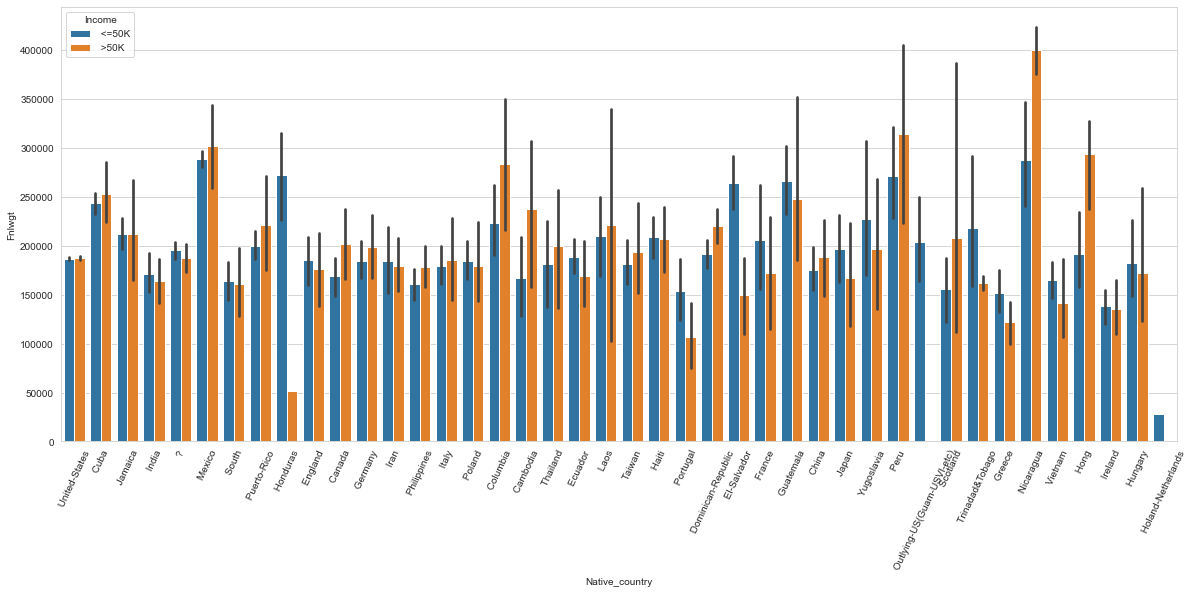

In [44]:
plt.figure(figsize=(20,8))
sns.barplot(x='Native_country',y='Fnlwgt',data=df,hue='Income')
plt.xticks(rotation=65)

In [45]:
# there is one unknown country present in country attribute

## Multivariate Analysis

In [46]:
# It shows the relation between various features.
df.corr()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
Age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
Fnlwgt,-0.076646,1.000000,-0.043159,0.000437,-0.010259,-0.018770
Education_num,0.036527,-0.043159,1.000000,0.122627,0.079932,0.148127
Capital_gain,0.077674,0.000437,0.122627,1.000000,-0.031614,0.078409
Capital_loss,0.057775,-0.010259,0.079932,-0.031614,1.000000,0.054256
Hours_per_week,0.068756,-0.018770,0.148127,0.078409,0.054256,1.000000


<AxesSubplot:>

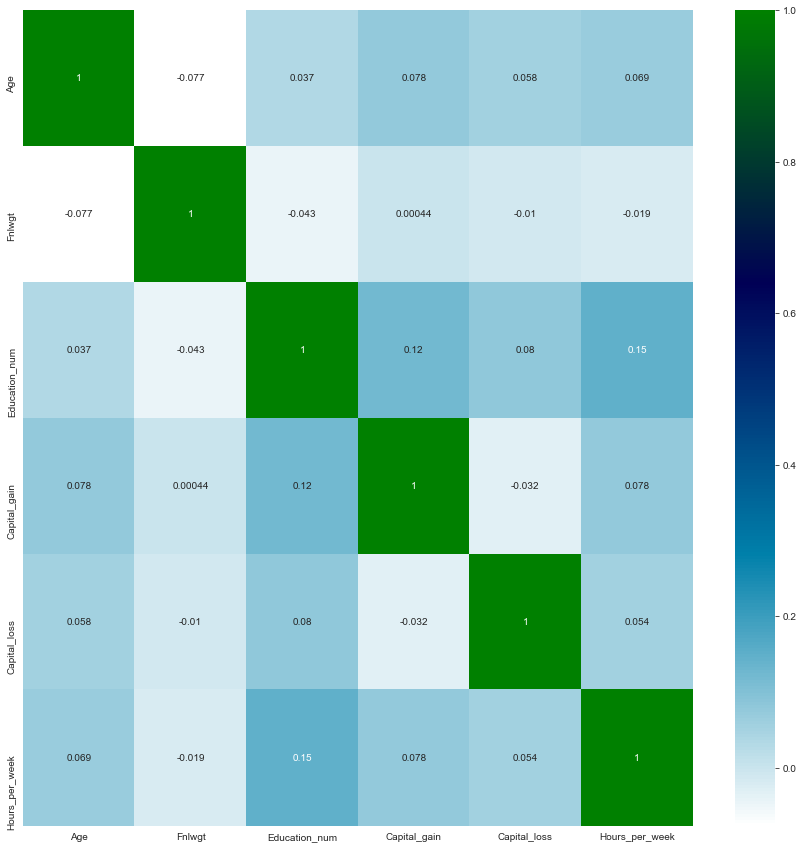

In [47]:
corr=df.corr()
fig,ax=plt.subplots(figsize=(15,15))
sns.heatmap(corr,cmap='ocean_r',annot=True,ax=ax)

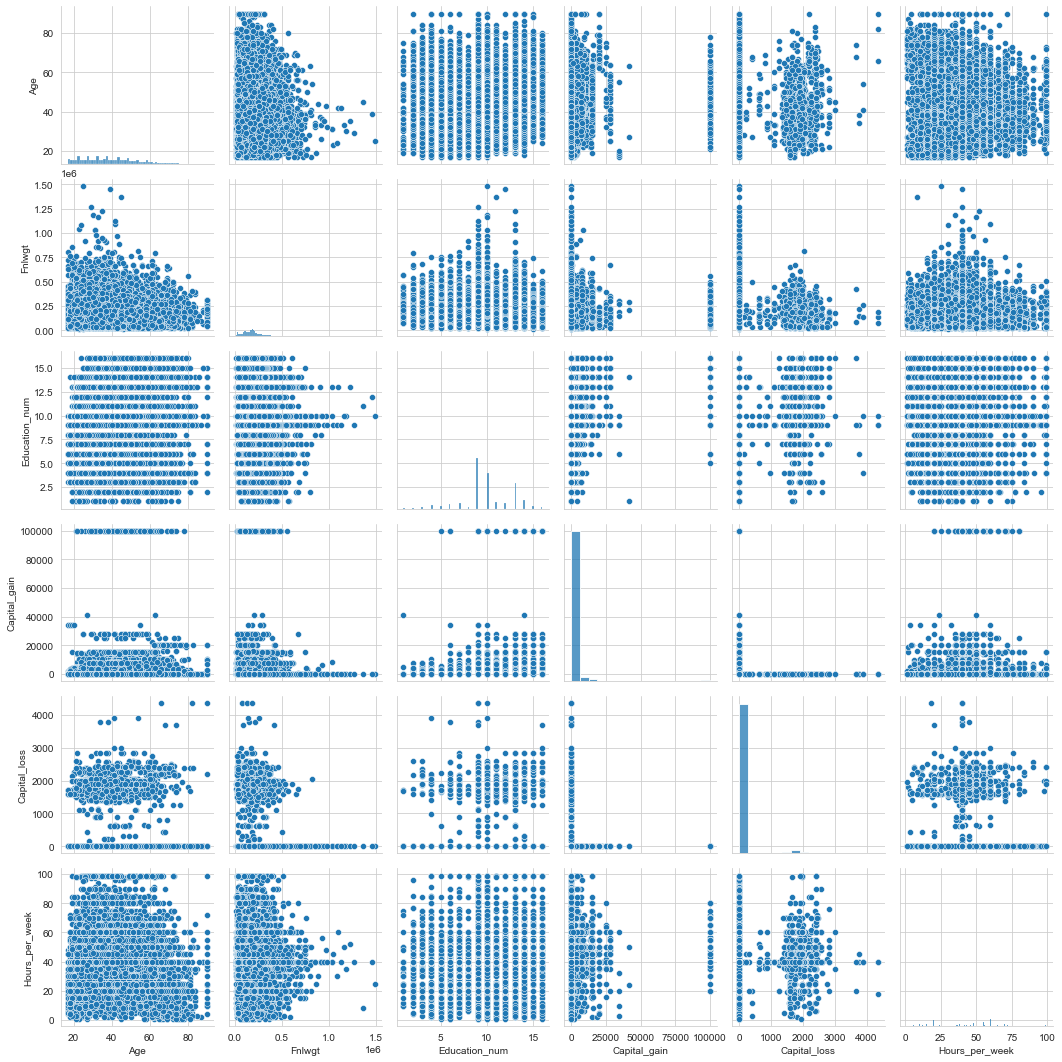

In [48]:
sns.pairplot(df)

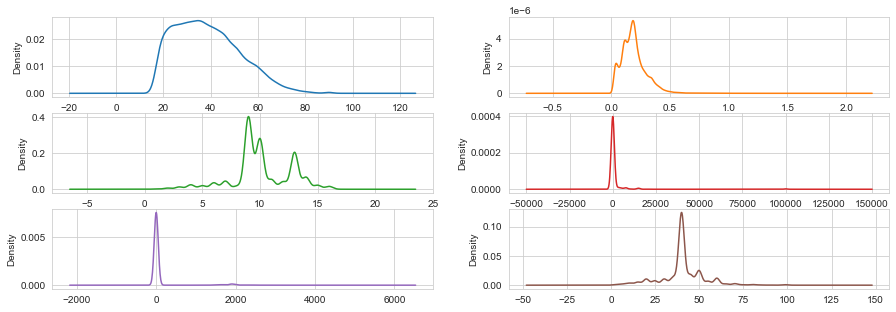

In [49]:
df.plot(kind='density',subplots=True,layout=(3,2),sharex=False, legend=False, fontsize=10,figsize=(15,5))
plt.show()

In [90]:
df.skew()

Age              -0.113322
Fnlwgt           -0.671301
Education_num    -0.311630
Capital_gain      3.028886
Capital_loss      4.301122
Hours_per_week    0.227636
dtype: float64

### Label Encoder

In [64]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
col = ['Workclass','Education', 'Marital_status','Occupation', 'Relationship', 'Race', 'Sex', 'Native_country','Income']
for i in col:
    df[i] = le.fit_transform(df[i])

df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,0.452055,6,0.048238,9,13,2,4,0,4,1,0.0,0.0,0.122449,39,0
1,0.287671,4,0.138113,11,9,0,6,1,4,1,0.0,0.0,0.397959,39,0
2,0.493151,4,0.151068,1,7,2,6,0,2,1,0.0,0.0,0.397959,39,0
3,0.150685,4,0.221488,9,13,2,10,5,2,0,0.0,0.0,0.397959,5,0
4,0.273973,4,0.184932,12,14,2,4,5,4,0,0.0,0.0,0.397959,39,0


In [65]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
cols = ['Age', 'Fnlwgt', 'Capital_gain', 'Capital_loss', 'Hours_per_week']
df[cols] = scaler.fit_transform(df[cols])

df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,0.452055,6,0.048238,9,13,2,4,0,4,1,0.0,0.0,0.122449,39,0
1,0.287671,4,0.138113,11,9,0,6,1,4,1,0.0,0.0,0.397959,39,0
2,0.493151,4,0.151068,1,7,2,6,0,2,1,0.0,0.0,0.397959,39,0
3,0.150685,4,0.221488,9,13,2,10,5,2,0,0.0,0.0,0.397959,5,0
4,0.273973,4,0.184932,12,14,2,4,5,4,0,0.0,0.0,0.397959,39,0


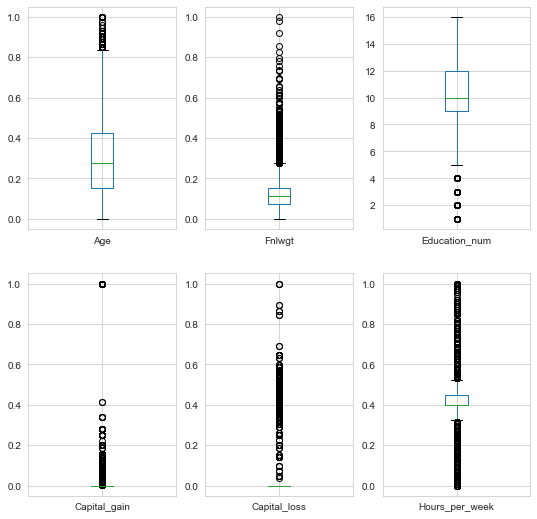

In [66]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (9, 9))

df.boxplot(column = "Age", ax = axes[0, 0]);
df.boxplot(column = "Fnlwgt", ax = axes[0, 1]);
df.boxplot(column = "Education_num", ax = axes[0, 2]);
df.boxplot(column = "Capital_gain", ax = axes[1, 0]);
df.boxplot(column = "Capital_loss", ax = axes[1, 1]);
df.boxplot(column = "Hours_per_week", ax = axes[1, 2]);

In [67]:
# As it can be seen that outliers are present in Age, Fnlwgt, Education_num, Capital_gain,Capital_loss and Hours_per_week.

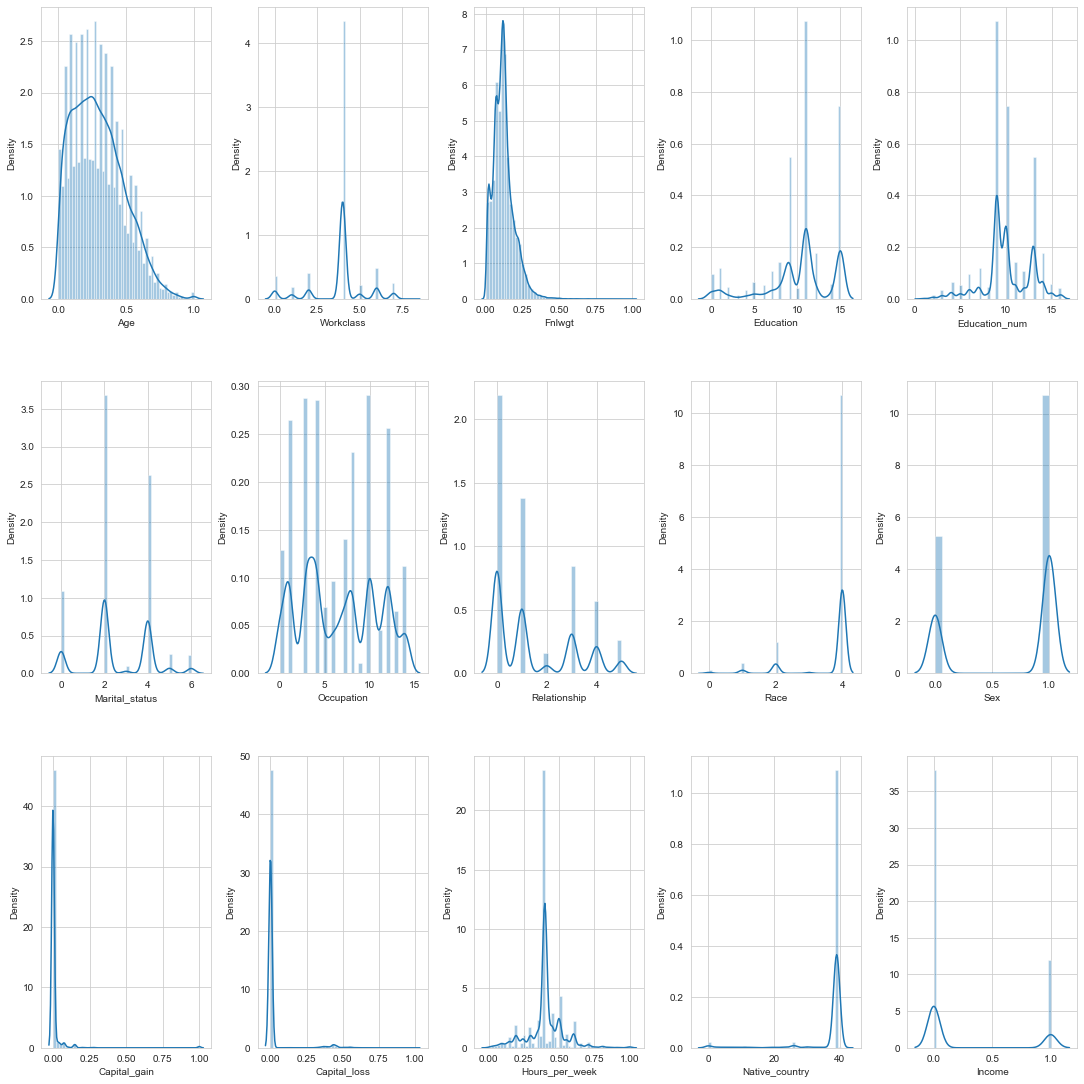

In [68]:
fig,ax=plt.subplots(ncols=5,nrows=3,figsize=(15,15))
index=0
ax=ax.flatten()

for col, value in df.items():
    sns.distplot(value,ax=ax[index])
    index +=1
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)

## Min Max Normalization

In [69]:
cols=['Capital_gain','Capital_loss','Native_country','Race','Relationship']
for col in cols:
    minimum=min(df[col])
    maximum=max(df[col])
    df[col]=(df[col]-minimum)/(maximum-minimum)

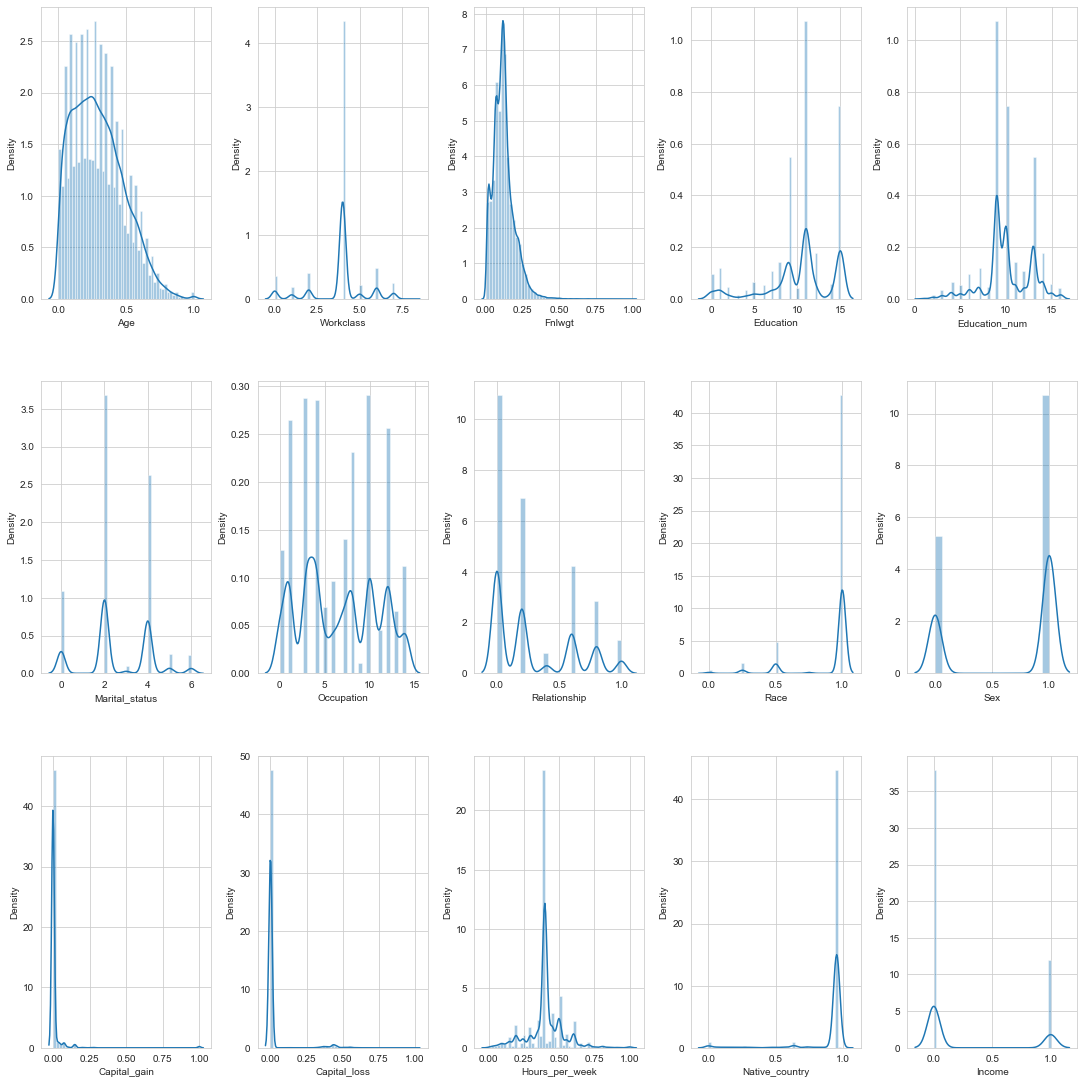

In [70]:
fig,ax=plt.subplots(ncols=5,nrows=3,figsize=(15,15))
index=0
ax=ax.flatten()

for col, value in df.items():
    sns.distplot(value,ax=ax[index])
    index +=1
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)

## Feature Importance

In [71]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [73]:
#Standardize the value of x so that mean will 0 and SD will become 1 , and make the data as normal distributed
sc = StandardScaler()
sc.fit_transform(df)
df = pd.DataFrame(df,columns=df.columns)

In [74]:
from sklearn.model_selection import train_test_split
#assign the value of x and y for training and testing phase
X = df.drop(columns=['Income'])
y = df[["Income"]]
print(X.shape)
print(y.shape)

(32560, 14)
(32560, 1)


# Model Building

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,f1_score,roc_curve,auc
from imblearn.over_sampling import SMOTE

In [76]:
def max_accuracy_score(clf,X,y):
    max_accuracy=0
    for i in range(42,100):
        X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=i,stratify=y)
        #x_train,y_train=SMOTE().fit_resample(x_train,y_train) ##over sampling of our Data
        clf.fit(X_train,y_train)
        pred=clf.predict(X_test)
        accuracy_check=accuracy_score(y_test,pred)
        if accuracy_check>max_accuracy:
            max_accuracy=accuracy_check
            final_r=i
    print('max accuracy score corresponding to',final_r,'is',max_accuracy)
    print('\n')
    print('cross validation score',cross_val_score(clf,X,y,scoring='accuracy').mean())
    print('\n')
    print('Standard Deviation',cross_val_score(clf,X,y,scoring='accuracy').std())
    print('\n')
    print('F1 score',f1_score(y_test,pred))
    print('\n')
    print('Training accuracy',clf.score(X_train,y_train))
    print('\n')
    print('Test Accuracy',clf.score(X_test,y_test))
    print('\n')
    print('Confusion Matrix',confusion_matrix(y_test,pred))
    print('\n')
    print('Classification Report',classification_report(y_test,pred))
    print('\n')
    print('Roc_auc Score',roc_auc_score(y_test,pred))
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pred)
    roc_auc = auc( false_positive_rate, true_positive_rate)
    plt.plot(false_positive_rate, true_positive_rate,label = "AUC = %0.2f"% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc = 'lower right')
    plt.ylabel("True positive rate")
    plt.xlabel("False positive rate")
    print("\n\n")
    return final_r

max accuracy score corresponding to 79 is 0.824017199017199


cross validation score 0.8156326781326781


Standard Deviation 0.002951600436543987


F1 score 0.5382215288611544


Training accuracy 0.8153025184275184


Test Accuracy 0.8181818181818182


Confusion Matrix [[4638  306]
 [ 878  690]]


Classification Report               precision    recall  f1-score   support

           0       0.84      0.94      0.89      4944
           1       0.69      0.44      0.54      1568

    accuracy                           0.82      6512
   macro avg       0.77      0.69      0.71      6512
weighted avg       0.81      0.82      0.80      6512



Roc_auc Score 0.689078908262334





79

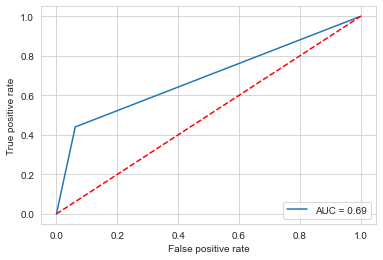

In [77]:
## Logistic Regression
lg=LogisticRegression()
max_accuracy_score(lg,X,y)

max accuracy score corresponding to 42 is 0.8223280098280098


cross validation score 0.8089987714987714


Standard Deviation 0.004594578170751999


F1 score 0.6029926774912449


Training accuracy 0.9999616093366094


Test Accuracy 0.808507371007371


Confusion Matrix [[4318  626]
 [ 621  947]]


Classification Report               precision    recall  f1-score   support

           0       0.87      0.87      0.87      4944
           1       0.60      0.60      0.60      1568

    accuracy                           0.81      6512
   macro avg       0.74      0.74      0.74      6512
weighted avg       0.81      0.81      0.81      6512



Roc_auc Score 0.7386679793276534





42

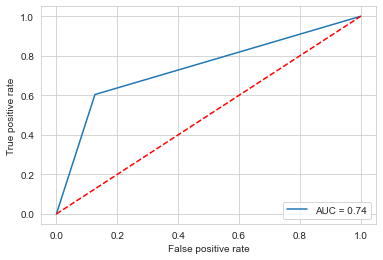

In [80]:
# Decision Tree Classifier
dt=DecisionTreeClassifier()
max_accuracy_score(dt,X,y)

max accuracy score corresponding to 85 is 0.8366093366093366


cross validation score 0.8239557739557739


Standard Deviation 0.0022329509495446396


F1 score 0.6205744822979292


Training accuracy 0.8723510442260443


Test Accuracy 0.8255528255528255


Confusion Matrix [[4447  497]
 [ 639  929]]


Classification Report               precision    recall  f1-score   support

           0       0.87      0.90      0.89      4944
           1       0.65      0.59      0.62      1568

    accuracy                           0.83      6512
   macro avg       0.76      0.75      0.75      6512
weighted avg       0.82      0.83      0.82      6512



Roc_auc Score 0.7459742999141403





85

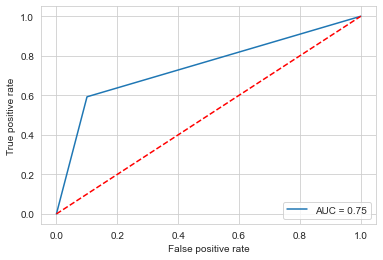

In [81]:
# KNn
knn=KNeighborsClassifier()
max_accuracy_score(knn,X,y)

max accuracy score corresponding to 42 is 0.8677825552825553


cross validation score 0.856941031941032


Standard Deviation 0.0034998812011820053


F1 score 0.6728971962616823


Training accuracy 0.9999616093366094


Test Accuracy 0.8548832923832924


Confusion Matrix [[4595  349]
 [ 596  972]]


Classification Report               precision    recall  f1-score   support

           0       0.89      0.93      0.91      4944
           1       0.74      0.62      0.67      1568

    accuracy                           0.85      6512
   macro avg       0.81      0.77      0.79      6512
weighted avg       0.85      0.85      0.85      6512



Roc_auc Score 0.7746536721484711





42

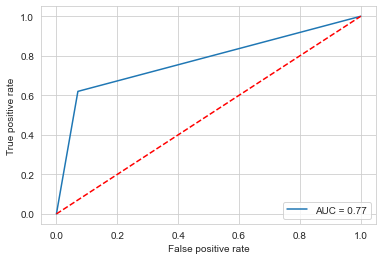

In [82]:
#Random forest
rf=RandomForestClassifier()
max_accuracy_score(rf,X,y)

max accuracy score corresponding to 73 is 0.8682432432432432


cross validation score 0.8588144963144962


Standard Deviation 0.005057412951470418


F1 score 0.665943600867679


Training accuracy 0.860411547911548


Test Accuracy 0.8581081081081081


Confusion Matrix [[4667  277]
 [ 647  921]]


Classification Report               precision    recall  f1-score   support

           0       0.88      0.94      0.91      4944
           1       0.77      0.59      0.67      1568

    accuracy                           0.86      6512
   macro avg       0.82      0.77      0.79      6512
weighted avg       0.85      0.86      0.85      6512



Roc_auc Score 0.7656724704444886





73

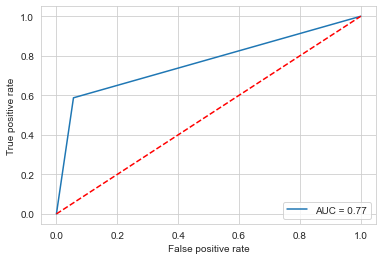

In [84]:
# adaboost
Adb=AdaBoostClassifier()
max_accuracy_score(Adb,X,y)

max accuracy score corresponding to 73 is 0.8733108108108109


cross validation score 0.8640356265356266


Standard Deviation 0.002235062088287513


F1 score 0.6695842450765865


Training accuracy 0.8692797911547911


Test Accuracy 0.8608722358722358


Confusion Matrix [[4688  256]
 [ 650  918]]


Classification Report               precision    recall  f1-score   support

           0       0.88      0.95      0.91      4944
           1       0.78      0.59      0.67      1568

    accuracy                           0.86      6512
   macro avg       0.83      0.77      0.79      6512
weighted avg       0.86      0.86      0.85      6512



Roc_auc Score 0.7668396241991942





73

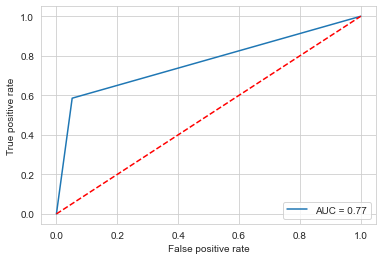

In [83]:
# Gardient Boost
gb=GradientBoostingClassifier()
max_accuracy_score(gb,X,y)

In [86]:
best_model=pd.DataFrame({'Model':['LogisticRegression','DecisionTreeClassifier','KNeighborsClassifier','RandomForestClassifier','AdaBoostClassifier','GradientBoostingClassifier'],
                         'Accuracy Score':[82.40,82.23,83.66,86.77,86.82,87.33],
                         'F1_Score':[53.82,60.29,62.05,67.28,66.59,66.95],
                         'Cross_validation':[81.56,80.89,82.39,85.69,85.88,86.40]})
best_model

,Model,Accuracy Score,F1_Score,Cross_validation
0,LogisticRegression,82.40,53.82,81.56
1,DecisionTreeClassifier,82.23,60.29,80.89
2,KNeighborsClassifier,83.66,62.05,82.39
3,RandomForestClassifier,86.77,67.28,85.69
4,AdaBoostClassifier,86.82,66.59,85.88
5,GradientBoostingClassifier,87.33,66.95,86.40


## Hyperparameter Tuning

In [87]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=84,test_size=.20,stratify=y)
ada=AdaBoostClassifier()
param={'n_estimators': [100,200,300],'learning_rate':[.001,.01,.1,1,10],'algorithm':['SAMME', 'SAMME.R']}

grid=GridSearchCV(estimator=ada,param_grid=param,scoring='accuracy',n_jobs=-1)

grid.fit(X_train,y_train)

grid.best_params_

{'algorithm': 'SAMME.R', 'learning_rate': 1, 'n_estimators': 300}

In [89]:
ada_final=AdaBoostClassifier(n_estimators=300,algorithm='SAMME.R',learning_rate=1)
ada_final.fit(X_train,y_train)
pred=ada_final.predict(X_test)
print('Final Accuracy_score :',accuracy_score(pred,y_test))
print('\n')
print('Final f_1 score :',f1_score(pred,y_test))
print('\n')
print('Final roc_auc score :',roc_auc_score(pred,y_test))
print('\n')
print('Final classification Report :',classification_report(pred,y_test))
print('\n')
print('Final confusion Matrix :',confusion_matrix(pred,y_test))

Final Accuracy_score : 0.875460687960688


Final f_1 score : 0.7143360338147234


Final roc_auc score : 0.8460459960509276


Final classification Report :               precision    recall  f1-score   support

           0       0.95      0.89      0.92      5241
           1       0.65      0.80      0.71      1271

    accuracy                           0.88      6512
   macro avg       0.80      0.85      0.82      6512
weighted avg       0.89      0.88      0.88      6512



Final confusion Matrix : [[4687  554]
 [ 257 1014]]


## Saving Model

In [90]:
import joblib
joblib.dump(ada_final,'Census_income_ada.pkl')